<a href="https://colab.research.google.com/github/JorgeRR89/Normal-Distribution-and-Fill-Rate/blob/main/Normal_Distribution_and_Fill_Rate(Mod2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Exercise Overview — Normal Distribution and Fill Rate

In this exercise, we will apply the concept of the **multivariate normal distribution** to solve an inventory planning problem.

The goal is to answer the question:

> “If one store needs 1,212 units of inventory, how much should the retailer keep in the warehouse to guarantee a **95% fill rate** for **two stores** with similar sales patterns?”

####  What we will do
1. **Import the required libraries** (`NumPy`, `Matplotlib`, `SciPy`, `math`).
2. **Define key variables**: expected demand, number of stores, and independent standard deviation.
3. **Calculate the combined mean and standard deviation** for the total number of stores.
4. **Plot the Probability Density Function (PDF)** of the normal distribution.
5. **Determine the fill rate** using the cumulative distribution function (**CDF**).
6. **Compute the inventory needed for a 95% fill rate** using the inverse CDF (**PPF** or percentile point function).
7. **Plot the PPF value** on top of the normal distribution curve.
8. **Extend the analysis to more stores (e.g., 5 or 12)** to observe how total demand and required inventory change.

####  How we will solve it
- We model total demand across multiple stores as a **normal distribution** with  
  `mean = expected demand × number of stores`  
  and `std = sqrt(number of stores) × individual standard deviation`.
- We use statistical functions from `scipy.stats`:
  - `stats.norm.pdf()` → to calculate the probability density.
  - `stats.norm.cdf()` → to compute the current fill rate.
  - `stats.norm.ppf()` → to estimate the inventory required for a 95% service level.
- Finally, we plot the results to visually interpret the relationship between **demand**, **available inventory**, and **service level (fill rate)**.

---


Let's first import all required libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

Let's define the variables that will be used.  

In [ ]:
#Expected Total Demand
expTotDemand = 800

#Number of Stores
numStores = 2

#Independant Standard deviation
iStd = 250

#Number of iterations
n=1000

Next, calculate the standard deviation and the mean then plot the probability density function.

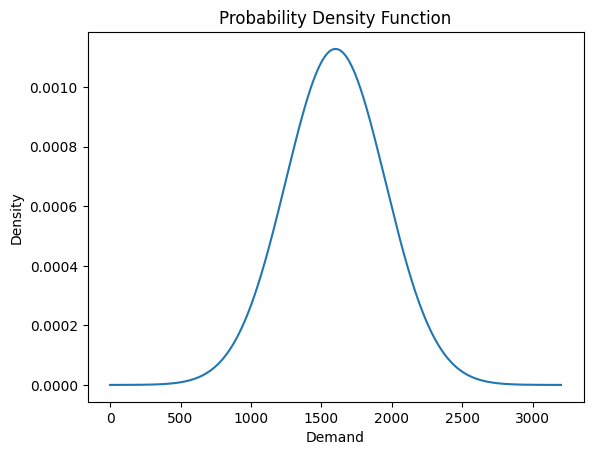

In [ ]:
#Guaranteed supply if all stores get 1000 units
guaranteedSupply = 1000 * numStores

# Calculate the mean
mean = expTotDemand * numStores

#Calculate standard deviation
std = math.sqrt(numStores) * iStd

#configure the line space
x = np.linspace(0, 1600 * numStores, n)

pdf_result = stats.norm.pdf(x,loc=mean,scale=std)

#Lable and plot the PDF against the pre-defined line space
plt.plot(x,pdf_result)
plt.xlabel('Demand')
plt.ylabel('Density')
plt.title("Probability Density Function")
plt.show()

Find the fill rate if 1000 units are in stock at each location.

In [ ]:
cdf = stats.norm.cdf(guaranteedSupply,mean,std)
cdf

0.8710504823538303

Next, calculate the Percentile point function (CDF inverse) to find how many units will be needed to fill 95% of orders.

In [ ]:
ppf = stats.norm.ppf(0.95,mean,std)
ppf

2181.543576838337

Plot the PPF against the normal distribution curve.

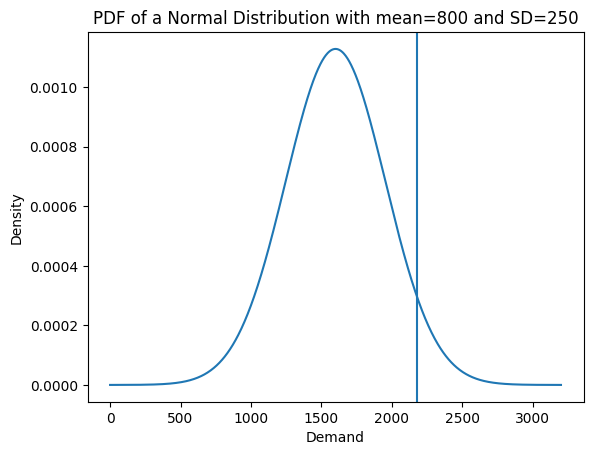

In [ ]:
#Plot the PPF as a line
plt.axvline(ppf)
plt.plot(x,pdf_result)

plt.xlabel('Demand')
plt.ylabel('Density')
plt.title("PDF of a Normal Distribution with mean=800 and SD=250")
plt.show()

Now let's see how we can perform our claculations on 5 independant stores. Change the corresponding variable

In [ ]:
#Number of Stores
numStores = 12

Now re-calculate the dependant variables.

In [ ]:
#Guaranteed supply if all stores get 1000 units
guaranteedSupply = 1000 * numStores

#Calculate the mean
mean = expTotDemand * numStores

#Calculate standard deviation
std = math.sqrt(numStores) * iStd


Display the new Probability density function.

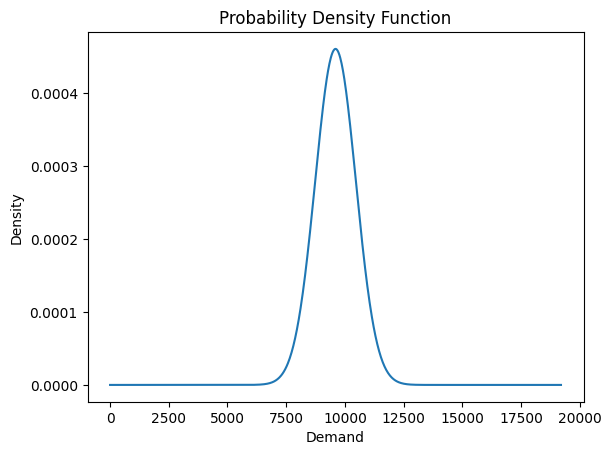

In [ ]:
#configure the line space
x = np.linspace(0, 1600 * numStores, n)

pdf_result = stats.norm.pdf(x,loc=mean,scale=std)

#Lable and plot the PDF against the pre-defined line space
plt.plot(x,pdf_result)
plt.xlabel('Demand')
plt.ylabel('Density')
plt.title("Probability Density Function")
plt.show()

Now what is the fill rate for all the sores comnined if each store gets 1000 units(guaranteed supply)?

In [ ]:
cdf = stats.norm.cdf(guaranteedSupply,mean,std)
cdf

0.9972081915968106

How much inventory is needed for 95% fill rate at all the stores?

In [ ]:
ppf = stats.norm.ppf(0.95,mean,std)
ppf

11024.485026446948

Let's plot the normal distribution along with 95% fill rate

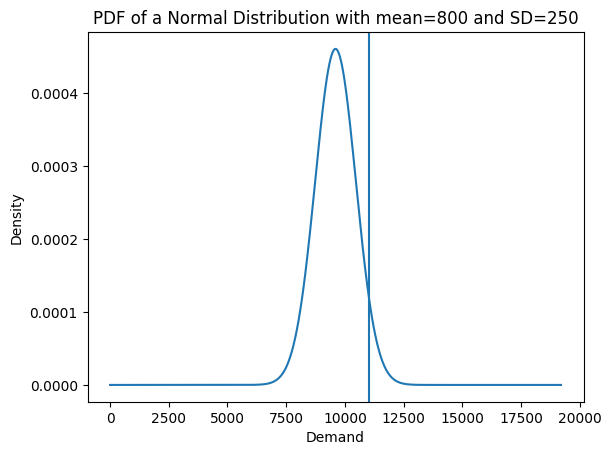

In [ ]:
#Plot the PPF as a line
plt.axvline(ppf)
plt.plot(x,pdf_result)

plt.xlabel('Demand')
plt.ylabel('Density')
plt.title("PDF of a Normal Distribution with mean=800 and SD=250")
plt.show()

###  Conclusions

- The total demand across multiple stores can be modeled using a **normal distribution**, where the mean increases linearly with the number of stores while the standard deviation increases with the square root of the number of stores.  
- When each store receives a fixed inventory level (e.g., 1,000 units), the **fill rate** can be calculated using the cumulative distribution function (**CDF**) of the normal distribution.  
- The **PPF (Percentile Point Function)** allows us to determine how much inventory is required to guarantee a specific service level—in this case, a **95% fill rate**.  
- As the number of stores increases, both the **expected total demand** and the **required safety stock** rise significantly, since demand variability grows with the square root of the number of independent locations.  
- Visualizing the PDF along with the PPF helps us understand where the 95% threshold lies relative to the full distribution of demand.  
- This approach provides a **data-driven way to set warehouse inventory levels**, balancing customer service levels against the risk of stockouts.

---
